In [23]:
# Everything needed in order to run this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 25)
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(context="notebook", font_scale=0.9)
plt.rcParams.update({
    "figure.figsize": (14, 12),
    "figure.dpi": 140,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Exploratory Data Analysis (EDA)

First we want to take a look at the data provided in the dataset. We want to first get an idea of what our dataset contains. Following that we will get statistcal information on the numerical features and create visualizations.

### Reading the CSV file

In [24]:
nba_stats = pd.read_csv('/home/kylep/cs3120/project/NBA-EDA-and-Model-Tuning/data/database_24_25.csv')
print(f"Our dataset has {nba_stats.shape[0]} rows and {nba_stats.shape[1]} columns.")
nba_stats.head()

Our dataset has 16512 rows and 25 columns.


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,1,2,0.500,0,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,13,15,0.867,3,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,0.600,2,2,1.000,0,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,0.667,0,0,0.000,2,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,0.800,2,3,0.667,0,0,0,2,0,0,1,1,22,17.8,2024-10-22


We will now want to take a look at the data types we have.

In [25]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16512 non-null  object 
 1   Tm      16512 non-null  object 
 2   Opp     16512 non-null  object 
 3   Res     16512 non-null  object 
 4   MP      16512 non-null  float64
 5   FG      16512 non-null  int64  
 6   FGA     16512 non-null  int64  
 7   FG%     16512 non-null  float64
 8   3P      16512 non-null  int64  
 9   3PA     16512 non-null  int64  
 10  3P%     16512 non-null  float64
 11  FT      16512 non-null  int64  
 12  FTA     16512 non-null  int64  
 13  FT%     16512 non-null  float64
 14  ORB     16512 non-null  int64  
 15  DRB     16512 non-null  int64  
 16  TRB     16512 non-null  int64  
 17  AST     16512 non-null  int64  
 18  STL     16512 non-null  int64  
 19  BLK     16512 non-null  int64  
 20  TOV     16512 non-null  int64  
 21  PF      16512 non-null  int64  
 22

Next, we are going to check if the dataset has any null entries.

In [26]:
null_count_per_column = nba_stats.isnull().sum()
print (null_count_per_column)

Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64


As we can see we have no missing entries. Next, let's list out all the data that contains an int or float. We will then get the statisical information from that data.

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = nba_stats.select_dtypes(include=numerics).copy()
numeric_df.describe()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,22.405259,3.848958,8.271742,0.427527,1.250061,3.477955,0.263719,1.572917,2.016897,0.417737,1.027253,3.071827,4.099079,2.453852,0.769985,0.468084,1.273861,1.749152,10.520894,8.575109
std,10.896645,3.255864,6.071434,0.254938,1.523651,3.151726,0.286271,2.233374,2.688863,0.435771,1.371552,2.717525,3.478652,2.613505,0.991039,0.833377,1.428819,1.436416,8.829493,7.821577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,14.427500,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.400000
50%,23.430000,3.000000,7.000000,0.444000,1.000000,3.000000,0.250000,1.000000,1.000000,0.333000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.100000
75%,31.322500,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,2.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.300000
max,50.480000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,18.000000,26.000000,1.000000,12.000000,23.000000,28.000000,22.000000,8.000000,10.000000,11.000000,6.000000,60.000000,54.200000


Now, that we have the dataset with just numerics I want to see the distributions of all the main features. The main features that have the most impact are: MP, PTS, AST, TRB, TOV, GmSc. I plan to make histograms on one plot so it easy for everyone to read the distributions.

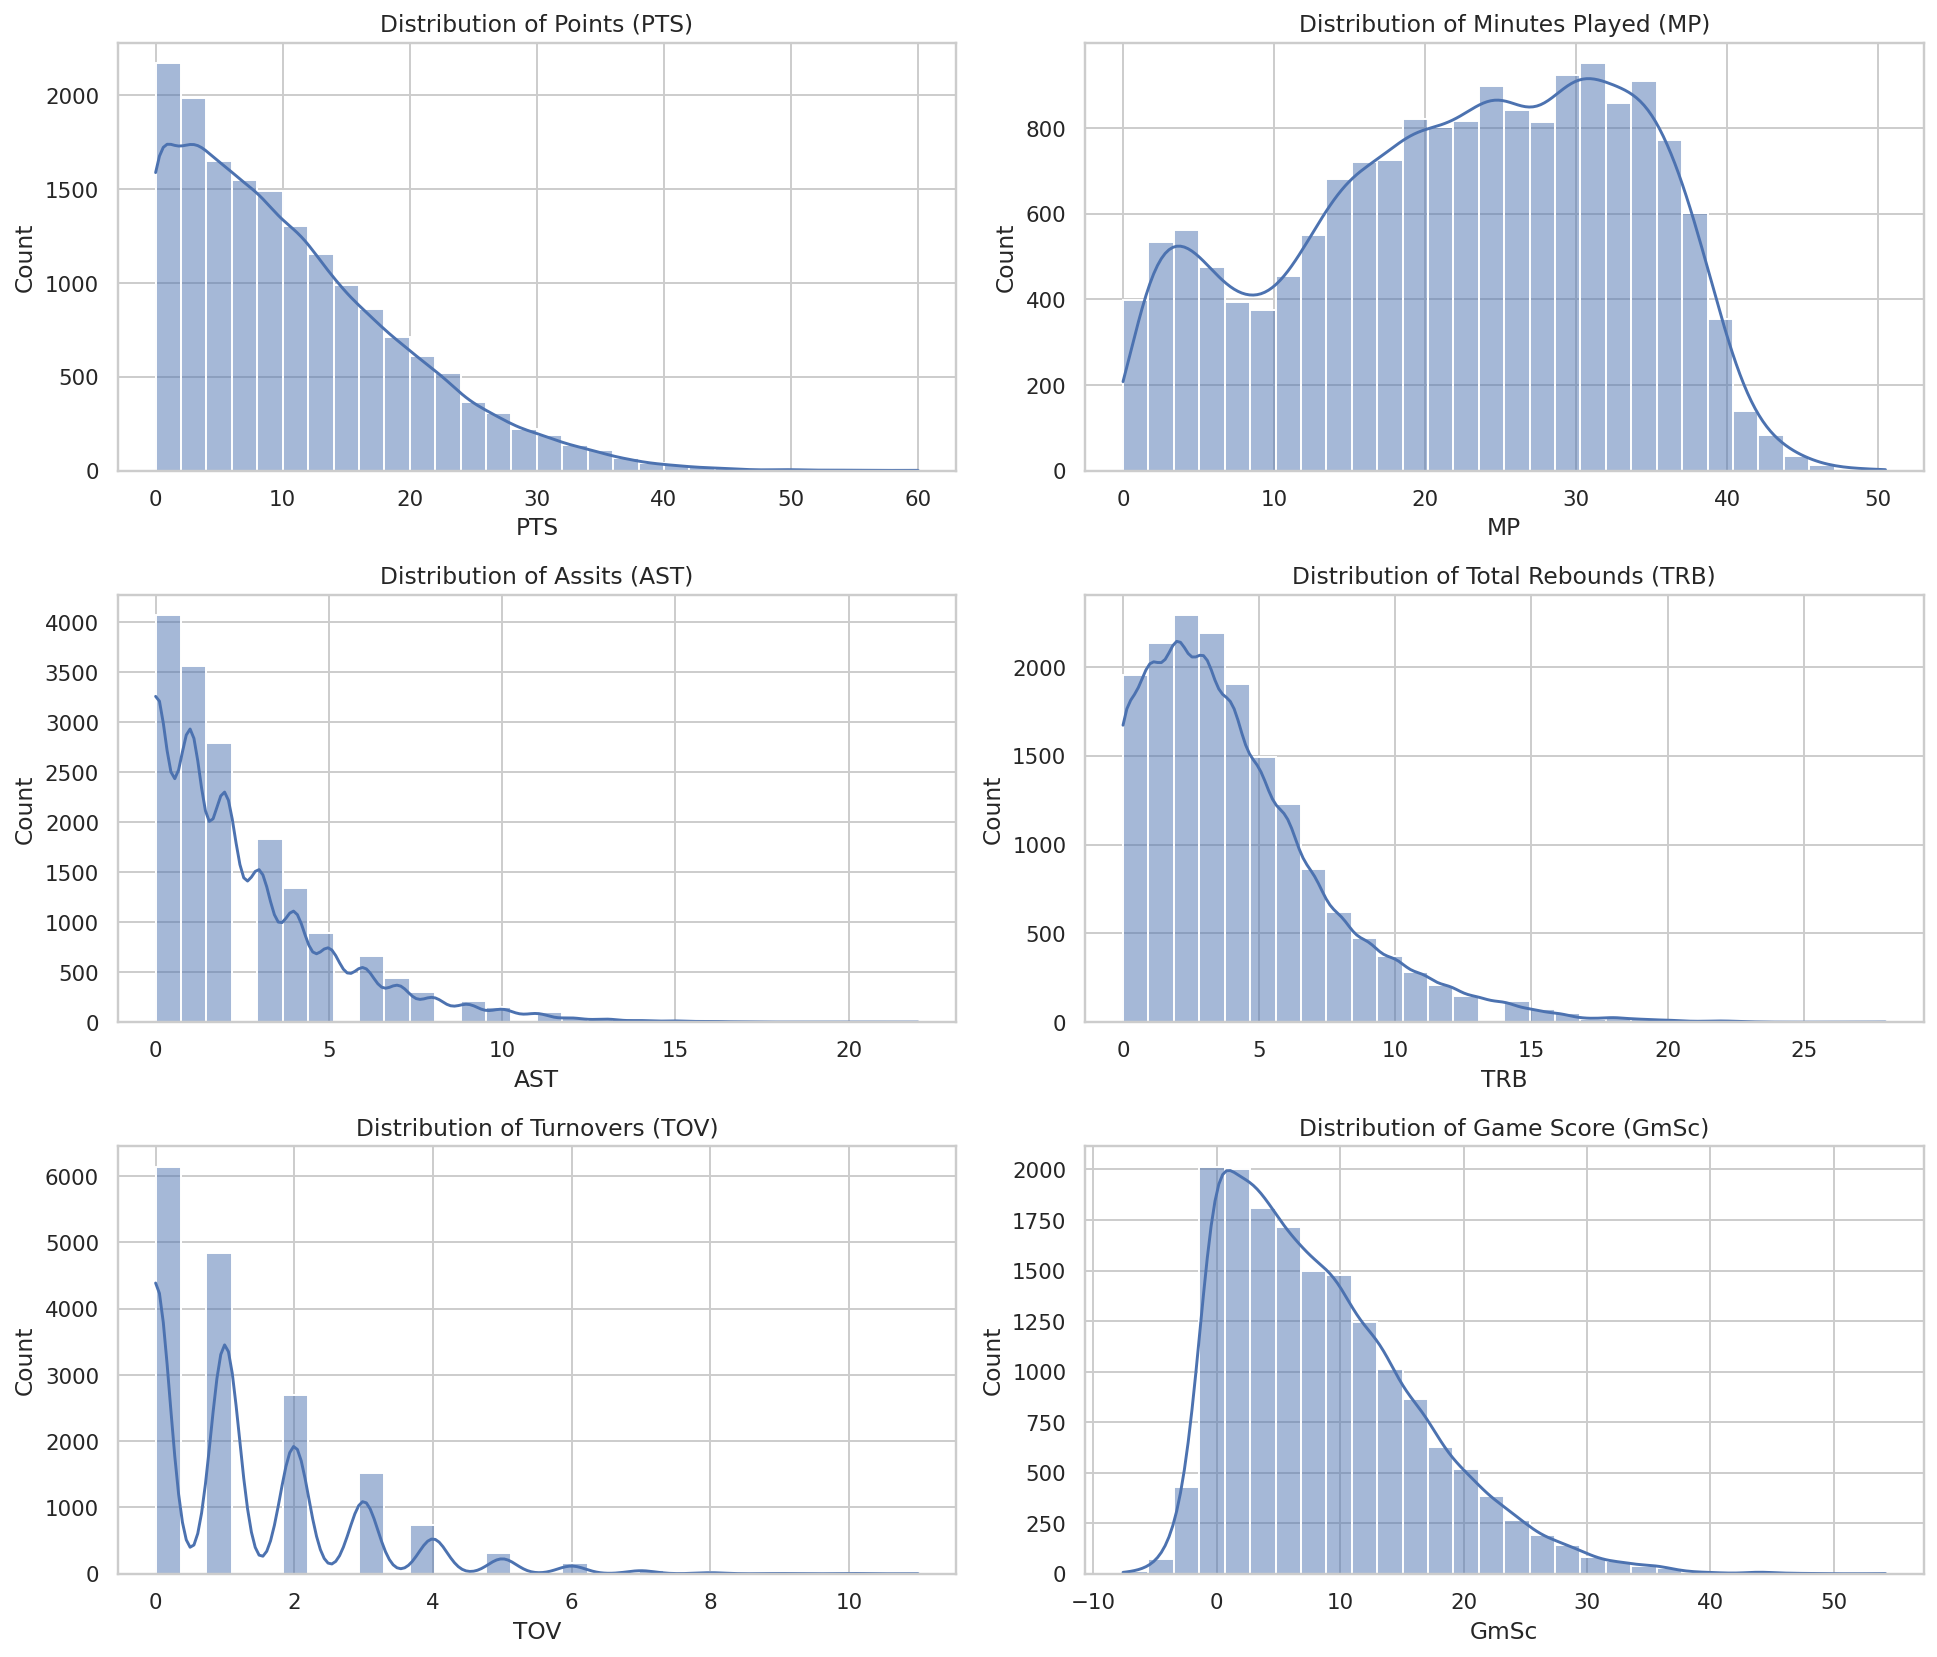

In [28]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.histplot(numeric_df['PTS'], bins = 30, kde=True, ax=axes[0, 0]).set_title('Distribution of Points (PTS)')
sns.histplot(numeric_df['MP'], bins = 30, kde=True, ax=axes[0, 1]).set_title('Distribution of Minutes Played (MP)')
sns.histplot(numeric_df['AST'], bins = 30, kde=True, ax=axes[1, 0]).set_title('Distribution of Assits (AST)')
sns.histplot(numeric_df['TRB'], bins = 30, kde=True, ax=axes[1, 1]).set_title('Distribution of Total Rebounds (TRB)')
sns.histplot(numeric_df['TOV'], bins = 30, kde=True, ax=axes[2, 0]).set_title('Distribution of Turnovers (TOV)')
sns.histplot(numeric_df['GmSc'], bins = 30, kde=True, ax=axes[2, 1]).set_title('Distribution of Game Score (GmSc)')

plt.tight_layout()
plt.show()

Next, we want to copy over the predictors to a Pandas Data Frame, X, and the outcome to a Pandas Data Frame, y.

In [29]:
X = numeric_df.drop(columns=['PTS']).copy() # Remove outcome PTS
y = numeric_df['PTS'].copy()

We will then see the shape of the X and y.

In [30]:
print(f"Shape of X: ({X.shape[0]} rows, {X.shape[1]} columns)")
print(f"Shape of y: ({y.shape[0]} rows,)")

Shape of X: (16512 rows, 19 columns)
Shape of y: (16512 rows,)


We are now going to sort the columns of X, the first column will have highest correlation with y, and so on down the list.

In [31]:
correlations = X.corrwith(y).abs().sort_values(ascending=False)
X = X[correlations.index]
X.head()

,FG,GmSc,FGA,MP,3P,FT,FTA,3PA,FT%,AST,DRB,TOV,TRB,FG%,3P%,STL,PF,ORB,BLK
0,14,38.1,18,30.30,8,1,2,11,0.500,10,4,1,4,0.778,0.727,1,1,0,1
1,11,34.0,23,37.58,1,13,15,3,0.867,4,13,1,16,0.478,0.333,1,1,3,3
2,8,22.4,13,26.63,6,2,2,10,1.000,4,3,0,3,0.615,0.600,1,1,0,0
3,7,19.5,9,30.52,4,0,0,6,0.000,4,2,0,4,0.778,0.667,1,2,2,0
4,8,17.8,10,25.85,4,2,3,5,0.667,2,0,1,0,0.800,0.800,0,1,0,0


Let's get the visualization of this correlation using a correlation matrix nor the numerical values.

<function matplotlib.pyplot.show(close=None, block=None)>

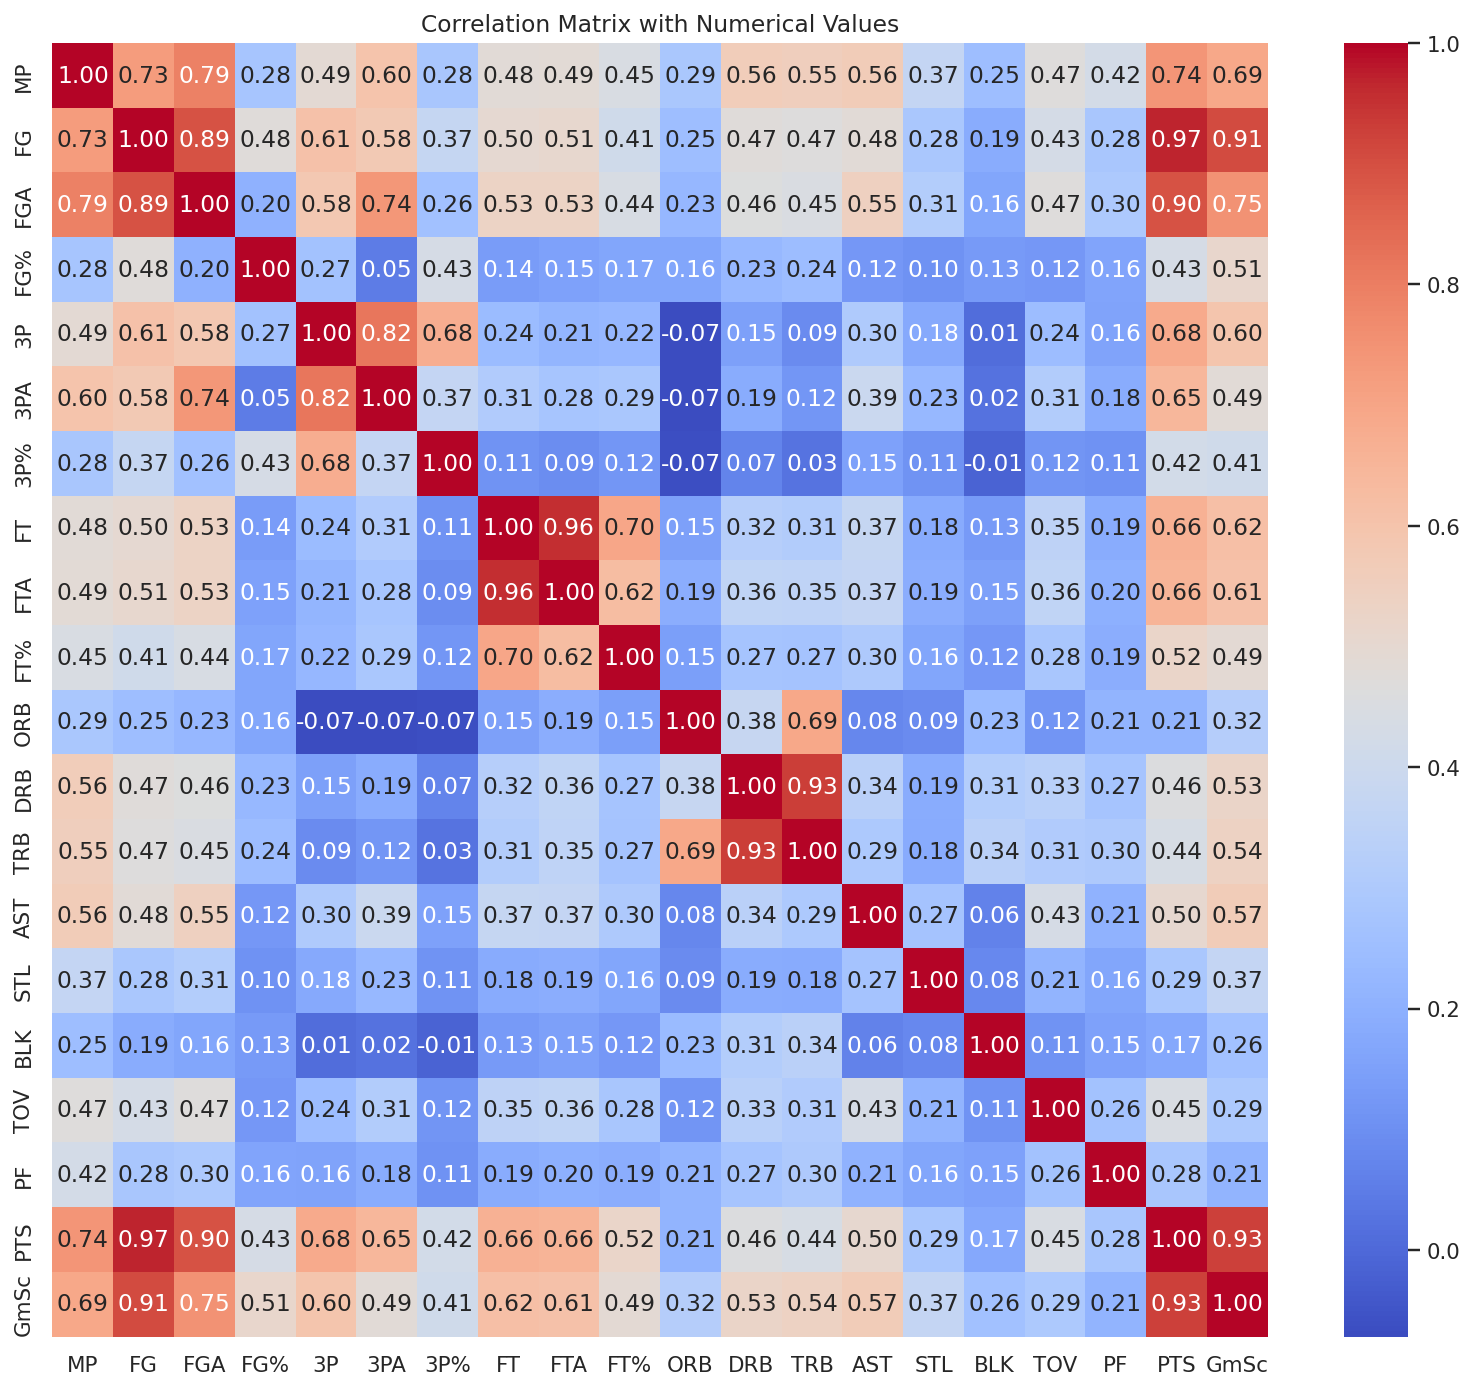

In [32]:
plt.Figure(figsize=(14, 12))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Numerical Values')
plt.show


I am now going to use the numeric_df to create a new dataset with just the numerics. I will then import that dataset into the next notebook, which will contatin the basebaline model and model tuning.

In [33]:
numeric_df.to_csv('numeric_dataset.csv', index=False)
print("Numeric Dataset saved correctly!")

Numeric Dataset saved correctly!
